Notebook initialization:

You need to run the next 3 cells!

In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

Esthetic definitions for the plots

In [2]:
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

Common settings for cosmological parameters and other CLASS parameters

In [3]:
common_settings = {
                   'output':'tCl,pCl,lCl',
                   # LambdaCDM parameters
                   'h':0.67556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'A_s':2.215e-9,
                   'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246,
                   'mass function' : 'T08M200c',
}


p18_cosmo = {
    
     # P18 1st column table 1 of https://arxiv.org/pdf/1807.06209.pdf
    'omega_b': 0.022383,
    'omega_cdm': 0.12011,
    'h': 0.6732,
    'tau_reio': 0.0543,
    'ln10^{10}A_s': 3.0448,
    'n_s': 0.96605,
    'k_pivot': 0.05,
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'm_ncdm': 0.06
}


gil_marin = {
    'h':0.7,
    'omega_b': 0.023,
    'omega_cdm': 0.1093,
    'n_s':0.95,
    'sigma8': 0.7913,
    'tau_reio': 0.0543,
}

simone = {}

lazanu = {
    'h':0.71,
    'omega_b': 0.0226,
    'omega_cdm': 0.11,
    'n_s':0.963,
    'A_s': 2.43e-9,
    'k_pivot': 0.002,
}

planck_2015 = {
    'omega_b' : 0.02226,
    'omega_cdm' : 0.1186,
    'A_s':  2.139e-9,
    'k_pivot': 0.05,
    'n_s': 0.9677,
    'h' : 0.6781
}

battaglia_16 = {
    'h':0.72,
    'Omega_b':0.043,
    'Omega_cdm':0.25-0.043,
    'n_s':0.96,
    'sigma8':0.8
    
}


z_for_pk_hm = 1.
M_min = 1e8
k_max_for_pk_class_sz = 1e2
z_max = 4.

pk_setup = {
'output': 'pk_at_z_1h,pk_at_z_2h,mPk,pk_gg_at_z_1h,pk_gg_at_z_2h',
'M_min' : M_min,
'm_min_counter_terms' : M_min,
'M_max' : 1e17,
'hm_consistency' : 1,
'z_min' : 1.e-6,
'z_max' : 4.,

"dlnk_for_pk_hm" : 0.01,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-4,
"k_max_for_pk_hm" : 2e1,
    
}

factor_sz = 1e-2

# Computing projected field ksz^2 x g

In [14]:
ksz_params = {

'omega_b' : 0.022383,
'omega_cdm' : 0.12011,
'h' : 0.6732,
'tau_reio' : 0.0543,
'ln10^{10}A_s' : 3.0448,
'n_s' : 0.96605,
'k_pivot' : 0.05,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0,
'pressure profile' : 'B12',
'k_min_for_pk_class_sz' : 0.001,
'k_max_for_pk_class_sz' : 60.0,
'k_per_decade_class_sz' : 50,
'P_k_max_h/Mpc' : 100.0,
'non linear' : 'halofit',
'z_min' : 0.01,
'M_min' : 1e10,
'm_min_counter_terms' : 1e10,
'M_max' : 1e+17,
'mass function' : 'T10',
'galaxy_sample' : 'unwise',
'galaxy_sample_id' : 'green',
'concentration parameter' : 'D08',
'use_hod' : 'yes',
'use_analytical_truncated_nfw' : 'yes',
'x_out_truncated_nfw_profile_satellite_galaxies' : 1,
'M0 equal M_min (HOD)' : 'no',
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'sigma_log10M_HOD' : 0.76,
'alpha_s_HOD' : 2.08,
'M_min_HOD' : 10100000000000.0,
'M1_prime_HOD' : 118000000000000.0,
'M0_HOD' : 0.0,
'x_out_truncated_nfw_profile' : 1.0,
'pk_nonlinear_for_vrms2' : 1,
'hm_consistency' : 1,
'sz_verbose' : 0, # for full output when not using python wrapper set to >100, this doesnt work with python wrapper
#'root' : 'sz_auxiliary_files/run_scripts/tmp/class-sz_tmp_',
#'write sz results to files' : 'yes',
'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.001,
'redshift_epsabs' : 1e-50,
'redshift_epsrel' : 0.001,
'mass_epsabs' : 1e-30,
'mass_epsrel' : 0.01,
'dell' : 300,
'ell_max' : 5000.0,
'ell_min' : 100.0,

'non linear' : 'halofit',
'nonlinear_verbose' : 0,
'ndim_masses' : 80,
'ndim_redshifts' : 80,
#'l_max_scalars' : 5000,
'output' : 'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_hf',
# 'output' : 'kSZ_kSZ_gal_1h,kSZ_kSZ_gal_2h,kSZ_kSZ_gal_3h',
'z_max' : 4.0,
#'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',

'n_ell_density_profile' : 50,
'n_m_density_profile' : 50,
'n_z_density_profile' : 50,
'k_per_decade_for_pk' : 50,
'z_max_pk' : 4.0,
    
    
'n_z_psi_b1g' : 100,
'n_l_psi_b1g' : 400,

'n_z_psi_b2g' : 100,
'n_l_psi_b2g' : 400,

'n_z_psi_b2t' : 100,
'n_l_psi_b2t' : 400,

'n_z_psi_b1t' : 100,
'n_l_psi_b1t' : 100,

'n_z_psi_b1gt' : 100,
'n_l_psi_b1gt' : 100,

'N_samp_fftw' : 2000,
'l_min_samp_fftw' : 1e-9,
'l_max_samp_fftw' : 1e9,
    
'N_kSZ2_gal_multipole_grid' :  70,
'N_kSZ2_gal_theta_grid' :  70,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,
}

In [15]:
M = Class()
M.set(ksz_params)
M.compute()
cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
M.struct_cleanup()
M.empty()

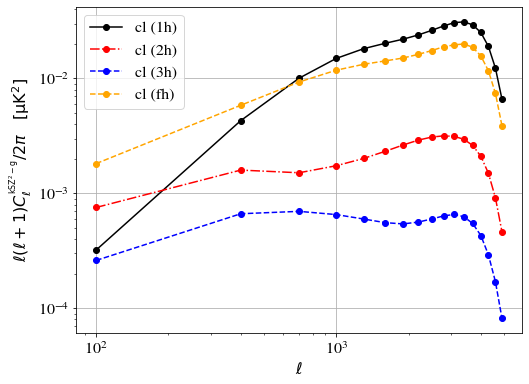

In [17]:

fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = 'cl (1h)',c='k',ls='-',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = 'cl (2h)',c='r',ls='-.',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = 'cl (3h)',c='b',ls='--',marker = 'o')
plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')

plt.loglog()
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$")
plt.grid()
plt.legend()
# plt.savefig('/Users/boris/Desktop/test_ksz_pf.

# Computing  matter bispectrum B(k1,k2,k3) - equilateral

In [7]:
zz = 1.
M_min = 1e8
M = Class()
params = planck_2015
M.set(params)
M.set({
    'mass function' : 'T10',
    'M_min': M_min,
    'M_max': 1e16,
    'hm_consistency':1,
    'output': 'bk_at_z_1h,bk_at_z_2h,bk_at_z_3h,bk_at_z_hf',
    'non linear': 'halofit',


    'P_k_max_h/Mpc' : 30.,
    'k_per_decade_for_pk' : 50,

    'k_min_for_pk_class_sz' : 1E-3,
    'k_max_for_pk_class_sz' : 20.,
    'k_per_decade_class_sz' : 50.,
    "dlnk_for_pk_hm" : 0.01,
    "z_for_pk_hm" : zz,
    "k_min_for_pk_hm" : 1e-4,
    "k_max_for_pk_hm" : 2e1,
})
M.compute()
bk_at_z_hm = M.bk_at_z_hm()





In [8]:
z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Qk1_smoothed = []
Qk1_SC = []
Bk1_SC = []
Bk1_GM = []
Qk1_TL = []
Qk1 = []
Bk1_TL = []
Q3n = []
nlk1 = []
nlk1_no_wiggles = []
pk_linear = []
pk_halofit = []
for k1 in k1_a:
  n = M.get_nl_index_at_z_and_k(z,k1)
  n_no_wiggles = M.get_nl_index_at_z_and_k_no_wiggles(z,k1)
  nlk1.append(n)
  nlk1_no_wiggles.append(n_no_wiggles)
  Q3n.append(4.-2.**n/(1.+2**(n+1.)))
  k2 = k1
  #mu = np.cos(0.6*np.pi)
  k3 = k1#np.sqrt(k1**2+k2**2+2*k1*k2*mu)
    
  # Note the conversions between Mpc to Mpc/h
  pk1 = M.pk_nonlin(k1*h,z)*h**3
  pk_halofit.append(pk1)
  pk2 = M.pk_nonlin(k2*h,z)*h**3
  pk3 = M.pk_nonlin(k3*h,z)*h**3
  pk1lin = M.pk_lin(k1*h,z)*h**3
  pk_linear.append(pk1lin)
  pk2lin = M.pk_lin(k2*h,z)*h**3
  pk3lin = M.pk_lin(k3*h,z)*h**3

  Qk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z)/(pk1lin*pk2lin + pk2lin*pk3lin + pk3lin*pk1lin))
  Bk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))
  Qk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z))
  Qk1.append(M.get_matter_bispectrum_at_z_effective_approach(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Qk1_smoothed.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_GM.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z))



Text(0.5, 1.0, 'M_min = 1.00e+08 Msun/h at z=1.00')

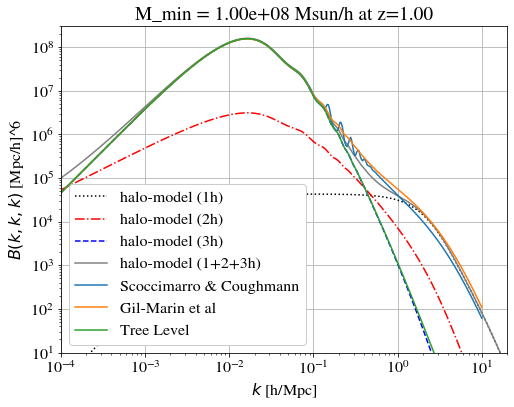

In [9]:
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['1h'],label = 'halo-model (1h)',c='k',ls=':')
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['2h'],label = 'halo-model (2h)',c='r',ls='-.')
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['3h'],label = 'halo-model (3h)',c='b',ls='--')
plt.plot(bk_at_z_hm['k'],np.asarray(bk_at_z_hm['1h'])+np.asarray(bk_at_z_hm['2h'])+np.asarray(bk_at_z_hm['3h']),label = 'halo-model (1+2+3h)',c='grey',ls='-')
# plt.plot(k1_a,np.asarray(Qk1),label='Q(k1) Gil-Marin',alpha=0.2)
# plt.plot(k1_a,np.asarray(Qk1_smoothed),label='Q(k1) Gil-Marin smoothed',c='r',lw=2.)
# plt.plot(k1_a,np.asarray(Qk1_SC),label='Q(k1) SC',alpha=0.2)

plt.plot(k1_a,np.asarray(Bk1_SC),label='Scoccimarro & Coughmann',alpha=1.)
plt.plot(k1_a,np.asarray(Bk1_GM),label='Gil-Marin et al',alpha=1.)
plt.plot(k1_a,np.asarray(Bk1_TL),label='Tree Level',alpha=1.)
plt.loglog()
plt.xlabel(r"$k$ [h/Mpc]")
plt.ylabel(r"$B(k,k,k)$ [Mpc/h]^6")
plt.ylim(1e1,3e8)
plt.xlim(1e-4,2e1)
plt.grid()
plt.legend(loc=3,frameon=True,framealpha=1)
plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_z1_wct_Mmin1e8.pdf')

# Computing  matter bispectrum B(k1,k2,k3) - squeezed

In [11]:
lambda2 = 1.
lambda3 = 0.01

In [10]:
zz = 1.
M_min = 1e8
M = Class()
params = planck_2015
M.set(params)
M.set({
    'mass function' : 'T10',
    'M_min': M_min,
    'M_max': 1e16,
    'hm_consistency':1,
    'output': 'bk_at_z_1h,bk_at_z_2h,bk_at_z_3h,bk_at_z_hf',
    'non linear': 'halofit',


    'P_k_max_h/Mpc' : 30.,
    'k_per_decade_for_pk' : 50,

    'k_min_for_pk_class_sz' : 1E-3,
    'k_max_for_pk_class_sz' : 20.,
    'k_per_decade_class_sz' : 50.,
    "dlnk_for_pk_hm" : 0.01,
    "z_for_pk_hm" : zz,
    "k_min_for_pk_hm" : 1e-4,
    "k_max_for_pk_hm" : 2e1,
    "bispectrum_lambda_2" : lambda2,
    "bispectrum_lambda_3" : lambda3
})
M.compute()
bk_at_z_hm = M.bk_at_z_hm()





In [12]:
z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Qk1_smoothed = []
Qk1_SC = []
Bk1_SC = []
Bk1_GM = []
Qk1_TL = []
Qk1 = []
Bk1_TL = []
Q3n = []
nlk1 = []
nlk1_no_wiggles = []
pk_linear = []
pk_halofit = []
for k1 in k1_a:
  n = M.get_nl_index_at_z_and_k(z,k1)
  n_no_wiggles = M.get_nl_index_at_z_and_k_no_wiggles(z,k1)
  nlk1.append(n)
  nlk1_no_wiggles.append(n_no_wiggles)
  Q3n.append(4.-2.**n/(1.+2**(n+1.)))
  k2 = lambda2*k1
  #mu = np.cos(0.6*np.pi)
  k3 = lambda3*k1#np.sqrt(k1**2+k2**2+2*k1*k2*mu)
    
  # Note the conversions between Mpc to Mpc/h
  pk1 = M.pk_nonlin(k1*h,z)*h**3
  pk_halofit.append(pk1)
  pk2 = M.pk_nonlin(k2*h,z)*h**3
  pk3 = M.pk_nonlin(k3*h,z)*h**3
  pk1lin = M.pk_lin(k1*h,z)*h**3
  pk_linear.append(pk1lin)
  pk2lin = M.pk_lin(k2*h,z)*h**3
  pk3lin = M.pk_lin(k3*h,z)*h**3

  Qk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z)/(pk1lin*pk2lin + pk2lin*pk3lin + pk3lin*pk1lin))
  Bk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))
  Qk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z))
  Qk1.append(M.get_matter_bispectrum_at_z_effective_approach(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Qk1_smoothed.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_GM.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z))



Text(0.5, 1.0, 'M_min = 1.00e+08 Msun/h at z=1.00')

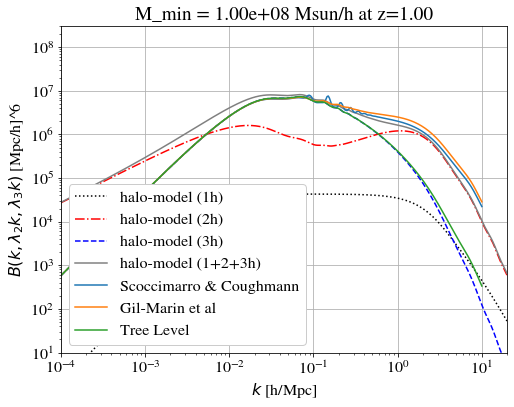

In [13]:
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['1h'],label = 'halo-model (1h)',c='k',ls=':')
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['2h'],label = 'halo-model (2h)',c='r',ls='-.')
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['3h'],label = 'halo-model (3h)',c='b',ls='--')
plt.plot(bk_at_z_hm['k'],np.asarray(bk_at_z_hm['1h'])+np.asarray(bk_at_z_hm['2h'])+np.asarray(bk_at_z_hm['3h']),label = 'halo-model (1+2+3h)',c='grey',ls='-')
# plt.plot(k1_a,np.asarray(Qk1),label='Q(k1) Gil-Marin',alpha=0.2)
# plt.plot(k1_a,np.asarray(Qk1_smoothed),label='Q(k1) Gil-Marin smoothed',c='r',lw=2.)
# plt.plot(k1_a,np.asarray(Qk1_SC),label='Q(k1) SC',alpha=0.2)

plt.plot(k1_a,np.asarray(Bk1_SC),label='Scoccimarro & Coughmann',alpha=1.)
plt.plot(k1_a,np.asarray(Bk1_GM),label='Gil-Marin et al',alpha=1.)
plt.plot(k1_a,np.asarray(Bk1_TL),label='Tree Level',alpha=1.)
plt.loglog()
plt.xlabel(r"$k$ [h/Mpc]")
plt.ylabel(r"$B(k,\lambda_2 k,\lambda_3 k)$ [Mpc/h]^6")
plt.ylim(1e1,3e8)
plt.xlim(1e-4,2e1)
plt.grid()
plt.legend(loc=3,frameon=True,framealpha=1)
plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_z1_wct_Mmin1e8.pdf')

# Computing  matter bispectrum B(k1,k2,k3) - flattened

In [28]:
lambda2 = 0.5
lambda3 = 0.5

In [29]:
zz = 1.
M_min = 1e8
M = Class()
params = planck_2015
M.set(params)
M.set({
    'mass function' : 'T10',
    'M_min': M_min,
    'M_max': 1e16,
    'hm_consistency':1,
    'output': 'bk_at_z_1h,bk_at_z_2h,bk_at_z_3h,bk_at_z_hf',
    'non linear': 'halofit',


    'P_k_max_h/Mpc' : 30.,
    'k_per_decade_for_pk' : 50,

    'k_min_for_pk_class_sz' : 1E-3,
    'k_max_for_pk_class_sz' : 20.,
    'k_per_decade_class_sz' : 50.,
    "dlnk_for_pk_hm" : 0.01,
    "z_for_pk_hm" : zz,
    "k_min_for_pk_hm" : 1e-4,
    "k_max_for_pk_hm" : 2e1,
    "bispectrum_lambda_2" : lambda2,
    "bispectrum_lambda_3" : lambda3
})
M.compute()
bk_at_z_hm = M.bk_at_z_hm()





In [30]:
z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Qk1_smoothed = []
Qk1_SC = []
Bk1_SC = []
Bk1_GM = []
Qk1_TL = []
Qk1 = []
Bk1_TL = []
Q3n = []
nlk1 = []
nlk1_no_wiggles = []
pk_linear = []
pk_halofit = []
for k1 in k1_a:
  n = M.get_nl_index_at_z_and_k(z,k1)
  n_no_wiggles = M.get_nl_index_at_z_and_k_no_wiggles(z,k1)
  nlk1.append(n)
  nlk1_no_wiggles.append(n_no_wiggles)
  Q3n.append(4.-2.**n/(1.+2**(n+1.)))
  k2 = lambda2*k1
  #mu = np.cos(0.6*np.pi)
  k3 = lambda3*k1#np.sqrt(k1**2+k2**2+2*k1*k2*mu)
    
  # Note the conversions between Mpc to Mpc/h
  pk1 = M.pk_nonlin(k1*h,z)*h**3
  pk_halofit.append(pk1)
  pk2 = M.pk_nonlin(k2*h,z)*h**3
  pk3 = M.pk_nonlin(k3*h,z)*h**3
  pk1lin = M.pk_lin(k1*h,z)*h**3
  pk_linear.append(pk1lin)
  pk2lin = M.pk_lin(k2*h,z)*h**3
  pk3lin = M.pk_lin(k3*h,z)*h**3

  Qk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z)/(pk1lin*pk2lin + pk2lin*pk3lin + pk3lin*pk1lin))
  Bk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))
  Qk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z))
  Qk1.append(M.get_matter_bispectrum_at_z_effective_approach(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Qk1_smoothed.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_GM.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z))



Text(0.5, 1.0, 'M_min = 1.00e+08 Msun/h at z=1.00')

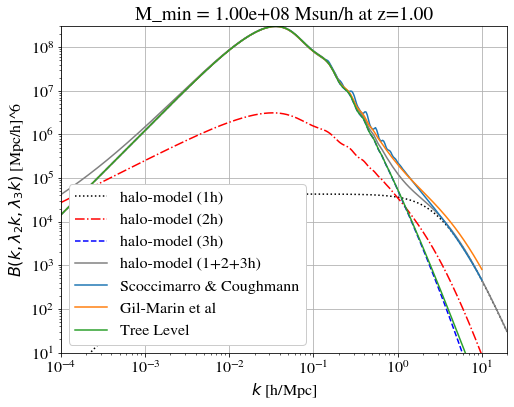

In [31]:
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['1h'],label = 'halo-model (1h)',c='k',ls=':')
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['2h'],label = 'halo-model (2h)',c='r',ls='-.')
plt.plot(bk_at_z_hm['k'],bk_at_z_hm['3h'],label = 'halo-model (3h)',c='b',ls='--')
plt.plot(bk_at_z_hm['k'],np.asarray(bk_at_z_hm['1h'])+np.asarray(bk_at_z_hm['2h'])+np.asarray(bk_at_z_hm['3h']),label = 'halo-model (1+2+3h)',c='grey',ls='-')
# plt.plot(k1_a,np.asarray(Qk1),label='Q(k1) Gil-Marin',alpha=0.2)
# plt.plot(k1_a,np.asarray(Qk1_smoothed),label='Q(k1) Gil-Marin smoothed',c='r',lw=2.)
# plt.plot(k1_a,np.asarray(Qk1_SC),label='Q(k1) SC',alpha=0.2)

plt.plot(k1_a,np.asarray(Bk1_SC),label='Scoccimarro & Coughmann',alpha=1.)
plt.plot(k1_a,np.asarray(Bk1_GM),label='Gil-Marin et al',alpha=1.)
plt.plot(k1_a,np.asarray(Bk1_TL),label='Tree Level',alpha=1.)
plt.loglog()
plt.xlabel(r"$k$ [h/Mpc]")
plt.ylabel(r"$B(k,\lambda_2 k,\lambda_3 k)$ [Mpc/h]^6")
plt.ylim(1e1,3e8)
plt.xlim(1e-4,2e1)
plt.grid()
plt.legend(loc=3,frameon=True,framealpha=1)
plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_z1_wct_Mmin1e8.pdf')

# Computing  TTG bispectrum B(k1,k2,k3) - equilateral

In [14]:
zz = 2.
M_min = 1e10
M = Class()
# params = planck_2015
# M.set(params)
M.set({

'omega_b' : 0.0226,
'omega_cdm' : 0.11,
'h' : 0.71,
'tau_reio' : 0.088,
'n_s' : 0.963,
'k_pivot' : 0.002,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0 ,   
    
'z_min':1e-6,
'z_max':4.0,


'mass function':'T10',
'M_min':M_min,
'M_max':1e+17,
'hm_consistency':1,


'concentration parameter':'D08',


'gas profile':'nfw', # b16

'sigma_log10M_HOD':0.76,
'alpha_s_HOD':2.08,
'M_min_HOD':10100000000000.0,
'M1_prime_HOD':118000000000000.0,
'M0_HOD':0.0,
'M0 equal M_min (HOD)':'no',

'pk_nonlinear_for_vrms2':0,
'delta for electron density':'200m',
'delta for galaxies':'200m',
'delta for matter density':'200m',
'sz_verbose':0,

'ndim_masses':150,
'ndim_redshifts':150,

'output':'bk_ttg_at_z_hf,bk_ttg_at_z_1h,bk_ttg_at_z_2h,bk_ttg_at_z_3h',

'dlnk_for_pk_hm':0.01,
'z_for_pk_hm':zz,

'k_min_for_pk_hm':0.001,
'k_max_for_pk_hm':10.0,
    
'k_min_for_pk_class_sz':0.0001,
'k_max_for_pk_class_sz':100.0,
'k_per_decade_class_sz':20.0,
'P_k_max_h/Mpc' : 148.54426619132502,

'non linear':'halofit'


})
M.compute()
bk_ttg_at_z_hm = M.bk_ttg_at_z_hm()




In [15]:
z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF = []
Bk_TTG_TL = []

pk_halofit = []
for k1 in k1_a:
  k2 = k1
  k3 = k1
  Bk_TTG_HF.append(M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL.append(M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))



The diff between Tree-level and hm is due to $b_2*g$ terms

Text(0.5, 1.0, 'M_min = 1.00e+10 Msun/h at z=2.00')

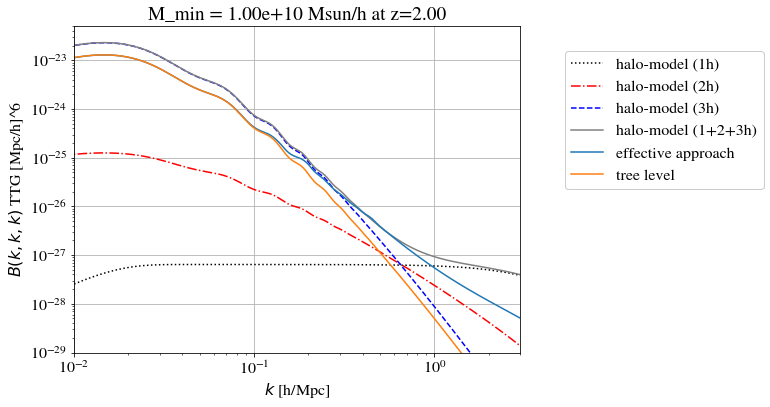

In [17]:
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['1h'],label = 'halo-model (1h)',c='k',ls=':')
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['2h'],label = 'halo-model (2h)',c='r',ls='-.')
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['3h'],label = 'halo-model (3h)',c='b',ls='--')
plt.plot(bk_ttg_at_z_hm['k'],np.asarray(bk_ttg_at_z_hm['1h'])+np.asarray(bk_ttg_at_z_hm['2h'])+np.asarray(bk_ttg_at_z_hm['3h']),label = 'halo-model (1+2+3h)',c='grey',ls='-')

plt.plot(k1_a,np.asarray(Bk_TTG_HF),label='effective approach',alpha=1.)
plt.plot(k1_a,np.asarray(Bk_TTG_TL),label='tree level',alpha=1.)

plt.loglog()
plt.xlabel(r"$k$ [h/Mpc]")
plt.ylabel(r"$B(k,k,k)$ TTG [Mpc/h]^6")
plt.ylim(1e-29,5e-23)
plt.xlim(1e-2,3e0)
plt.grid()
plt.legend(loc=(1.1,0.5),frameon=True,framealpha=1)
plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_ttg_z1_wct_Mmin1e10_wob2.pdf')

# Computing  TTG bispectrum B(k1,k2,k3) - squeezed

In [18]:
lambda2 = 1.
lambda3 = 0.01

In [20]:
zz = 2.
M_min = 1e10
M = Class()
# params = planck_2015
# M.set(params)
M.set({

'omega_b' : 0.0226,
'omega_cdm' : 0.11,
'h' : 0.71,
'tau_reio' : 0.088,
'n_s' : 0.963,
'k_pivot' : 0.002,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0 ,   
    
'z_min':1e-6,
'z_max':4.0,


'mass function':'T10',
'M_min':M_min,
'M_max':1e+17,
'hm_consistency':1,


'concentration parameter':'D08',


'gas profile':'nfw', # b16

'sigma_log10M_HOD':0.76,
'alpha_s_HOD':2.08,
'M_min_HOD':10100000000000.0,
'M1_prime_HOD':118000000000000.0,
'M0_HOD':0.0,
'M0 equal M_min (HOD)':'no',

'pk_nonlinear_for_vrms2':0,
'delta for electron density':'200m',
'delta for galaxies':'200m',
'delta for matter density':'200m',
'sz_verbose':0,

'ndim_masses':150,
'ndim_redshifts':150,

'output':'bk_ttg_at_z_hf,bk_ttg_at_z_1h,bk_ttg_at_z_2h,bk_ttg_at_z_3h',

'dlnk_for_pk_hm':0.01,
'z_for_pk_hm':zz,

'k_min_for_pk_hm':0.001,
'k_max_for_pk_hm':10.0,
    
'k_min_for_pk_class_sz':0.0001,
'k_max_for_pk_class_sz':100.0,
'k_per_decade_class_sz':20.0,
'P_k_max_h/Mpc' : 148.54426619132502,

'non linear':'halofit',
"bispectrum_lambda_2" : lambda2,
"bispectrum_lambda_3" : lambda3

})
M.compute()
bk_ttg_at_z_hm = M.bk_ttg_at_z_hm()




In [22]:
z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF = []
Bk_TTG_TL = []

pk_halofit = []
for k1 in k1_a:
  k2 = lambda2*k1
  k3 = lambda3*k1
  Bk_TTG_HF.append(M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL.append(M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))



The diff between Tree-level and hm is due to $b_2*g$ terms

Text(0.5, 1.0, 'M_min = 1.00e+10 Msun/h at z=2.00')

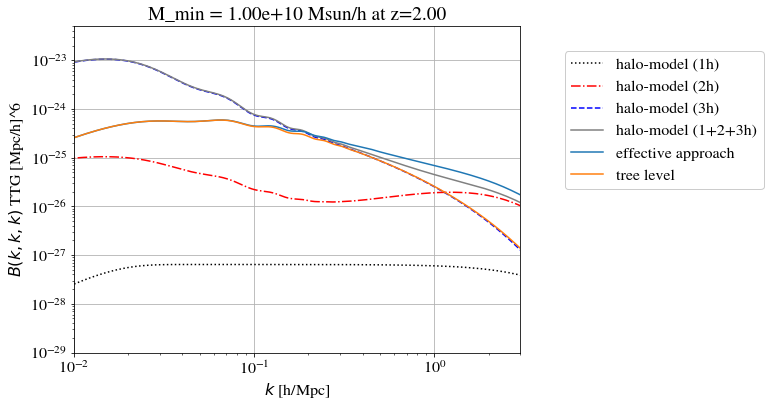

In [23]:
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['1h'],label = 'halo-model (1h)',c='k',ls=':')
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['2h'],label = 'halo-model (2h)',c='r',ls='-.')
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['3h'],label = 'halo-model (3h)',c='b',ls='--')
plt.plot(bk_ttg_at_z_hm['k'],np.asarray(bk_ttg_at_z_hm['1h'])+np.asarray(bk_ttg_at_z_hm['2h'])+np.asarray(bk_ttg_at_z_hm['3h']),label = 'halo-model (1+2+3h)',c='grey',ls='-')

plt.plot(k1_a,np.asarray(Bk_TTG_HF),label='effective approach',alpha=1.)
plt.plot(k1_a,np.asarray(Bk_TTG_TL),label='tree level',alpha=1.)

plt.loglog()
plt.xlabel(r"$k$ [h/Mpc]")
plt.ylabel(r"$B(k,k,k)$ TTG [Mpc/h]^6")
plt.ylim(1e-29,5e-23)
plt.xlim(1e-2,3e0)
plt.grid()
plt.legend(loc=(1.1,0.5),frameon=True,framealpha=1)
plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_ttg_z1_wct_Mmin1e10_wob2.pdf')

# Computing  TTG bispectrum B(k1,k2,k3) - flattened

In [24]:
lambda2 = 0.5
lambda3 = 0.5

In [25]:
zz = 2.
M_min = 1e10
M = Class()
# params = planck_2015
# M.set(params)
M.set({

'omega_b' : 0.0226,
'omega_cdm' : 0.11,
'h' : 0.71,
'tau_reio' : 0.088,
'n_s' : 0.963,
'k_pivot' : 0.002,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0 ,   
    
'z_min':1e-6,
'z_max':4.0,


'mass function':'T10',
'M_min':M_min,
'M_max':1e+17,
'hm_consistency':1,


'concentration parameter':'D08',


'gas profile':'nfw', # b16

'sigma_log10M_HOD':0.76,
'alpha_s_HOD':2.08,
'M_min_HOD':10100000000000.0,
'M1_prime_HOD':118000000000000.0,
'M0_HOD':0.0,
'M0 equal M_min (HOD)':'no',

'pk_nonlinear_for_vrms2':0,
'delta for electron density':'200m',
'delta for galaxies':'200m',
'delta for matter density':'200m',
'sz_verbose':0,

'ndim_masses':150,
'ndim_redshifts':150,

'output':'bk_ttg_at_z_hf,bk_ttg_at_z_1h,bk_ttg_at_z_2h,bk_ttg_at_z_3h',

'dlnk_for_pk_hm':0.01,
'z_for_pk_hm':zz,

'k_min_for_pk_hm':0.001,
'k_max_for_pk_hm':10.0,
    
'k_min_for_pk_class_sz':0.0001,
'k_max_for_pk_class_sz':100.0,
'k_per_decade_class_sz':20.0,
'P_k_max_h/Mpc' : 148.54426619132502,

'non linear':'halofit',
"bispectrum_lambda_2" : lambda2,
"bispectrum_lambda_3" : lambda3

})
M.compute()
bk_ttg_at_z_hm = M.bk_ttg_at_z_hm()




In [26]:
z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF = []
Bk_TTG_TL = []

pk_halofit = []
for k1 in k1_a:
  k2 = lambda2*k1
  k3 = lambda3*k1
  Bk_TTG_HF.append(M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL.append(M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))



The diff between Tree-level and hm is due to $b_2*g$ terms

Text(0.5, 1.0, 'M_min = 1.00e+10 Msun/h at z=2.00')

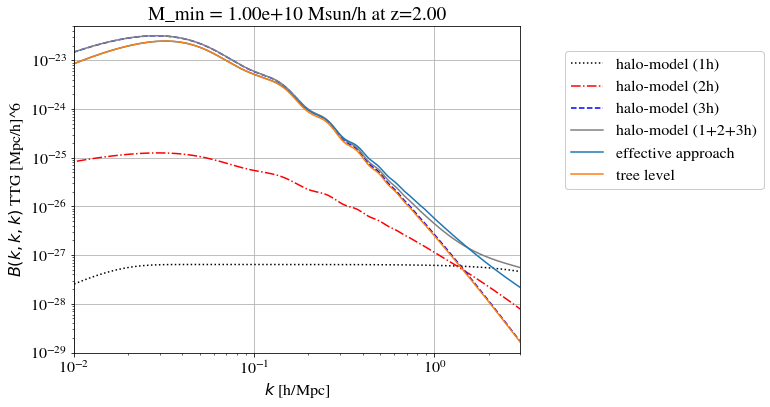

In [27]:
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['1h'],label = 'halo-model (1h)',c='k',ls=':')
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['2h'],label = 'halo-model (2h)',c='r',ls='-.')
plt.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['3h'],label = 'halo-model (3h)',c='b',ls='--')
plt.plot(bk_ttg_at_z_hm['k'],np.asarray(bk_ttg_at_z_hm['1h'])+np.asarray(bk_ttg_at_z_hm['2h'])+np.asarray(bk_ttg_at_z_hm['3h']),label = 'halo-model (1+2+3h)',c='grey',ls='-')

plt.plot(k1_a,np.asarray(Bk_TTG_HF),label='effective approach',alpha=1.)
plt.plot(k1_a,np.asarray(Bk_TTG_TL),label='tree level',alpha=1.)

plt.loglog()
plt.xlabel(r"$k$ [h/Mpc]")
plt.ylabel(r"$B(k,k,k)$ TTG [Mpc/h]^6")
plt.ylim(1e-29,5e-23)
plt.xlim(1e-2,3e0)
plt.grid()
plt.legend(loc=(1.1,0.5),frameon=True,framealpha=1)
plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_ttg_z1_wct_Mmin1e10_wob2.pdf')

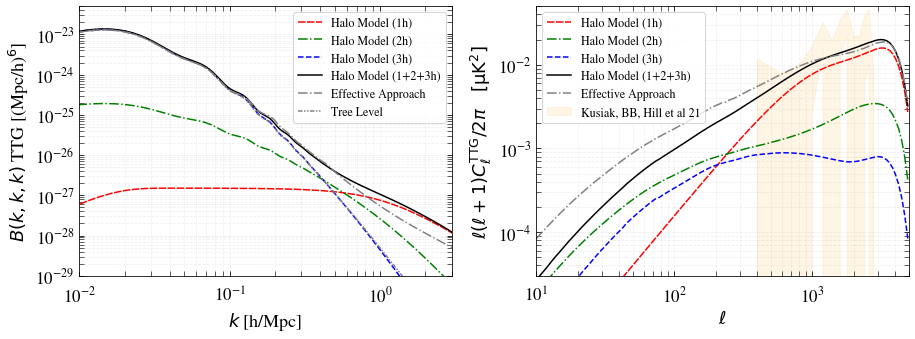

In [7]:
kSZ_kSZ_gal_1h_fft = []
kSZ_kSZ_gal_2h_fft = []
kSZ_kSZ_gal_3h_fft = []
kSZ_kSZ_gal_hf = []
multipoles = []
R = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/ksz2g_b16_agn_example.txt')
kSZ_kSZ_gal_1h_fft.append(R[:,54])
kSZ_kSZ_gal_2h_fft.append(R[:,55])
kSZ_kSZ_gal_3h_fft.append(R[:,56])
kSZ_kSZ_gal_hf.append(R[:,46])
multipoles.append(R[:,0])

label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(13,5))
ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{TTG}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)
id_p = 0
fac = (2.726e6)**2*multipoles[id_p]*(multipoles[id_p]+1.)/2./np.pi
ax.plot(multipoles[id_p],kSZ_kSZ_gal_1h_fft[id_p]*fac,
        c='r',ls=(0, (5, 1)),alpha = 1.,
        # label = val_label[id_p] + ' (1h)',
        label = 'Halo Model (1h)')
ax.plot(multipoles[id_p],kSZ_kSZ_gal_2h_fft[id_p]*fac,color='g',
        ls='-.',alpha = 1.,
        # label = val_label[id_p] + ' (1h)',
        label = 'Halo Model (2h)')
ax.plot(multipoles[id_p],np.abs(kSZ_kSZ_gal_3h_fft[id_p])*fac,color='b',
        ls='--',alpha = 1.,
        # label = val_label[id_p] + ' (1h)',
        label = 'Halo Model (3h)')
ax.plot(multipoles[id_p],np.abs(kSZ_kSZ_gal_1h_fft[id_p]*fac+kSZ_kSZ_gal_2h_fft[id_p]*fac+kSZ_kSZ_gal_3h_fft[id_p]*fac),
        color='k',
        ls='-',alpha = 1.,
        # label = val_label[id_p] + ' (3h)',
        label = 'Halo Model (1+2+3h)')#,
bgeff = 1
ax.plot(multipoles[id_p],kSZ_kSZ_gal_hf[id_p]*fac*bgeff,
        c='grey',ls='-.',
        label = 'Effective Approach')


Ola_eff = np.loadtxt('/Users/boris/Work/ksz_bispectra/black_unwise_green.txt')
cell_ola_eff = Ola_eff[1,:]
ell_ola_eff = Ola_eff[0,:]
Ola_measurements = np.loadtxt('/Users/boris/Work/ksz_bispectra/pink_unwise_green.txt')
err_cell_ola_measurements = Ola_measurements[2,:]
cell_ola_measurements = Ola_measurements[1,:]
ell_ola_measurements = Ola_measurements[0,:]

#ax.plot(ell_ola_eff,cell_ola_eff*1.2/5.,label='ola eff')

ax.fill_between(ell_ola_measurements,
                cell_ola_measurements*1.2/5.-err_cell_ola_measurements*1.2/5.,
                cell_ola_measurements*1.2/5.+err_cell_ola_measurements*1.2/5.,
            label='Kusiak, BB, Hill et al 21',
            color='orange',
            alpha=0.1)






ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(3e-5,5e-2)
ax.set_xlim(10,5e3)
ax.legend(loc=2,ncol = 1,frameon=True,fontsize=12)


ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
# ax.set_xlabel(r'$\ell$',size=title_size)
# ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)
ax.set_xlabel(r"$k$ [h/Mpc]",size=title_size)
ax.set_ylabel(r"$B(k,k,k)$ TTG [(Mpc/h)$^6$]",size=title_size)
ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['1h'],label = 'Halo Model (1h)',c='r',ls=(0, (5, 1)))
ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['2h'],label = 'Halo Model (2h)',c='g',ls='-.')
ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['3h'],label = 'Halo Model (3h)',c='b',ls='--')
ax.plot(bk_ttg_at_z_hm['k'],np.asarray(bk_ttg_at_z_hm['1h'])+np.asarray(bk_ttg_at_z_hm['2h'])+np.asarray(bk_ttg_at_z_hm['3h']),
        label = 'Halo Model (1+2+3h)',
        c='k',ls='-')

ax.plot(k1_a,np.asarray(Bk_TTG_HF),label='Effective Approach',alpha=1.,c='grey',ls='-.')
ax.plot(k1_a,np.asarray(Bk_TTG_TL),label='Tree Level',alpha=1.,c='grey',ls= (0, (3, 1, 1, 1, 1, 1)))





ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc=1,ncol = 1,frameon=True,fontsize=12)
ax.set_ylim(1e-29,5e-23)
ax.set_xlim(1e-2,3e0)

fig.tight_layout()
#plt.savefig("/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/kSZ2g_b16_agn.pdf")